# 1.0 **FUNÇÕES AGREGADAS**

## 1.1 **FUNÇÕES DE AGREDAÇÃO**

Para que serve?
* Servem para executar operações nos registros de uma coluna.

**TIPOS DE FUNÇÕES AGREGADAS**

```sql
-- COUNT()
-- SUM()
-- MIN()
-- MAX()
-- AVG()
```



### **EXEMPLOS**

**COUNT()**

**(Exemplo 1)** Contagem de todas as linhas de uma tabela
* Conte todas as visitas realizadas ao site da empresa fictícia

**Query:**

```sql
select count(*)
from temp_tables.regions
```



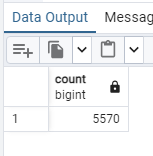

> Nos retornou a quantidade de linhas da tabela.

**(Exemplo 2)** Contagem das linhas de uma coluna
* Conte todos os pagamentos registrados na tabela sales.funnel

**Query:**

```sql
select count(*)
from sales.funnel
where paid_date is not null
```



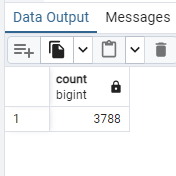

> Retornei apenas as linhas aonde consta o paid_date(data do pagamento) não era nulo.

**(Exemplo 3)** Contagem distinta de uma coluna
* Conte todos os produtos distintos visitados em jan/21

**Query:**

```sql
select count(distinct product_id)
from sales.funnel
where visit_page_date between '20210101' and '20210131'
```



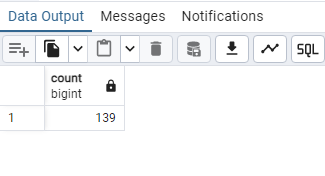

> Aqui foi retornado apenas os produtos distintos entre si, do mês de janeiro de 2021

**OUTRAS FUNÇÕES**

**(Exemplo 4)** Calcule o preço mínimo, máximo e médio dos productos da tabela products

**Query:**

```sql
select min(price), max(price), round(avg(price),2) from sales.products
```



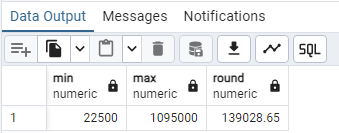

> Tambem utilizei a função para aredondar o valor medio.

>

(Exemplo 5) Informe qual é o veículo mais caro da tabela products

**Query:**

```sql
CREATE OR REPLACE FUNCTION get_max_price()
RETURNS numeric AS $$
DECLARE
  valor numeric;
BEGIN
  SELECT MAX(price) INTO valor FROM sales.products;
  RETURN valor;
END;
$$ LANGUAGE plpgsql;

select *
from sales.products
where price = get_max_price()
```



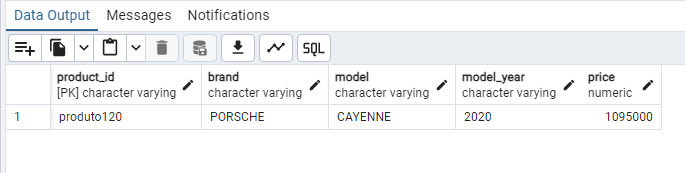

> Aqui criei uma função(Desnecessaria nesse contexto) para guardar o valor da subquery

### **RESUMO**

- (1) Servem para executar operações aritmética nos registros de uma coluna
- (2) Funções agregadas não computam células vazias (NULL) como zero
- (3) Na função COUNT() pode-se utilizar o asterisco (*) para contar os registros
- (4) COUNT(DISTINCT ) irá contar apenas os valores exclusivos

## 1.2 **GROUP BY**

Para que servE?
* Serve para agrupar registros semelhantes de uma coluna
* Normalmente utilizado em conjunto com as Funções de agregação

### **EXEMPLOS**

**(Exemplo 1**) Contagem agrupada de uma coluna
- Calcule o nº de clientes da tabela customers por estado

**Query:**

```sql
select state, count(*) as clientes_por_estado
from sales.customers
group by state
order by clientes_por_estado desc
```



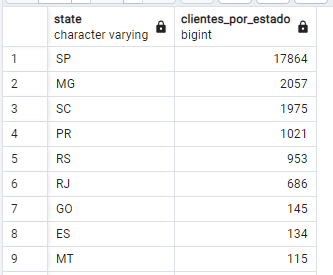

> Trouxemos o numero de clientes por estado.

(Exemplo 2) Contagem agrupada de várias colunas
- Calcule o nº de clientes por estado e status profissional

**Query:**

```sql
select state, professional_status, count(*) as clientes_por_estado
from sales.customers
group by state, professional_status
order by state, clientes_por_estado
```



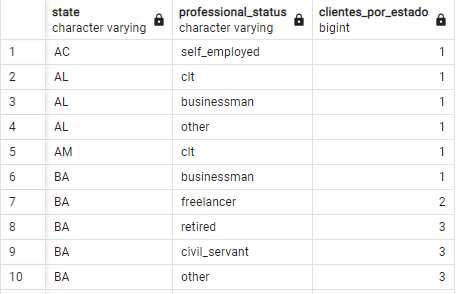

> conseguimis agrupar o estatus professional por estado com a quantidade

**(Exemplo 3)** Seleção de valores distintos
- Selecione os estados distintos na tabela customers utilizando o group by

**Query:**

```sql
select state
from sales.customers
order by state
```



### **RESUMO**

- (1) Serve para agrupar registros semelhantes de uma coluna,
- (2) Normalmente utilizado em conjunto com as Funções de agregação
- (3) Pode-se referenciar a coluna a ser agrupada pela sua posição ordinal  (ex: GROUP BY 1,2,3 irá agrupar pelas 3 primeiras colunas da tabela)
- (4) O GROUP BY sozinho funciona como um DISTINCT, eliminando linhas duplicadas

>

## 1.3 **HAVING**

Para que serve?
- Serve para filtrar linhas da seleção por uma coluna agrupada

### **EXEMPLOS**

(Exemplo 1) seleção com filtro no HAVING
- Calcule o nº de clientes por estado filtrando apenas estados acima de 100 clientes

Query:

```sql
select state, count(*)
from sales.customers
group by state
having count(*) > 100
```



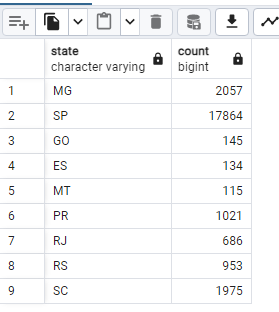

> Trouxemos a quantidade de clientes por estado.

### **RESUMO**

- (1) Tem a mesma função do WHERE mas pode ser usado para filtrar os resultados
 das funções agregadas enquanto o WHERE possui essa limitação
- (2) A função HAVING também pode filtrar colunas não agregadas

# 2.0 **EXERCÍCIOS**

(Exercício 1) Conte quantos clientes da tabela sales.customers tem menos de 30 anos

Query:

```sql
select count(*) as clientes_menos_de30
from sales.customers
where extract(year from age(birth_date)) > 30
```



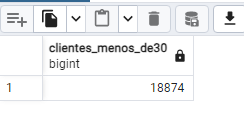

> Trouxemos todos os clientes que possui menos de 30 anos.

(Exercício 2) Informe a idade do cliente mais velho e mais novo da tabela sales.customers

Query:


```sql
select first_name, last_name, extract(year from age(birth_date)) as idade
from sales.customers
group by first_name, last_name, birth_date
having extract(year from age(birth_date)) =
		(select max(extract(year from age(birth_date))) from sales.customers)
	or extract(year from age(birth_date)) =
		(select min(extract(year from age(birth_date))) from sales.customers)
```



> Fiz uma pequena consultado no google de como tirar a idade diretamento da data de nascimento e facilitou muito o processo.

(Exercício 3) Selecione todas as informações do cliente mais rico da tabela sales.customers
- (possívelmente a resposta contém mais de um cliente)

Query:

```sql
select *
from sales.customers
where income = (select max(income) from sales.customers)
```



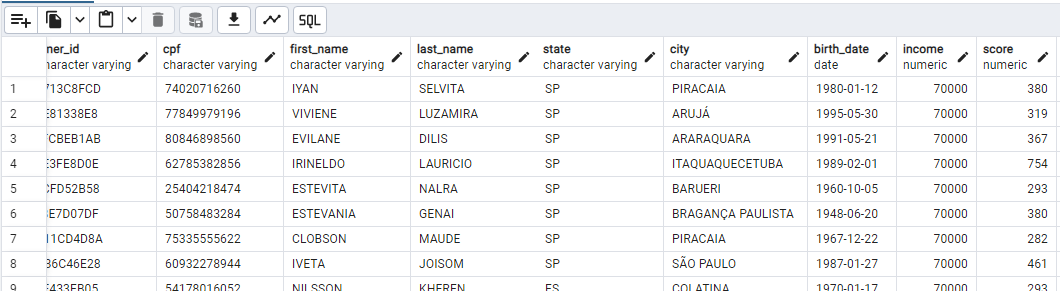

> Troxe todos os clientes com maior salario.

(Exercício 4) Conte quantos veículos de cada marca tem registrado na tabela sales.products
- Ordene o resultado pelo nome da marca

query:

```sql
select brand, count(product_id) as quantidade_produtos
from sales.products
group by brand
order by brand
```



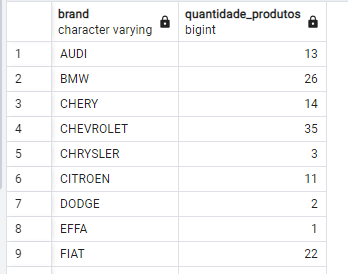

> Ficou ordenado em ordem alfabetica.

(Exercício 5) Conte quantos veículos existem registrados na tabela sales.products
-- por marca e ano do modelo. Ordene pela nome da marca e pelo ano do veículo

query:

```sql
select brand, model_year, count(product_id) as quantidade_produtos
from sales.products
group by brand, model_year
order by brand

```



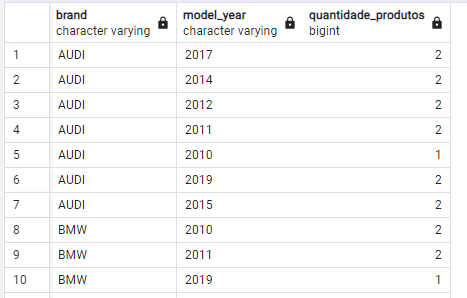

> Conseguimos filtrar por ano do modelo.

 (Exercício 6) Conte quantos veículos de cada marca tem registrado na tabela sales.products
-- e mostre apenas as marcas que contém mais de 10 veículos registrados

query:

```sql
select brand, count(product_id) as quantidade_produtos
from sales.products
group by brand
having count(product_id) > 10
order by quantidade_produtos desc
```



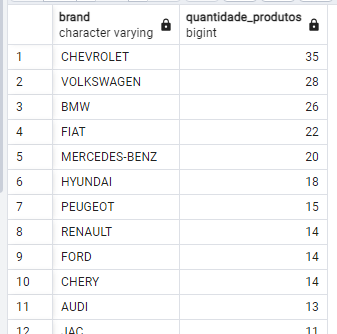

> Filtrei buscando as marcas com mais de 10 veiculos cadastrados e ordenei pela quantidade.